In [1]:
import librosa
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [2]:
dataset_path = '/Users/hongtan/Downloads/archive/audio_speech_actors_01-24'

In [91]:
# Function to extract features from each audio file
def extract_features(file_path):
    audio, sr = librosa.load(file_path, sr=22050, duration=None)
    
    S = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=128, fmax=8000)
    S_dB = librosa.power_to_db(S, ref=np.max)
    
    return S_dB

In [92]:
# Function to preprocess the data
def preprocess_data(dataset_path):
    X = []
    y = []
    for folder in os.listdir(dataset_path):
        for file in os.listdir(os.path.join(dataset_path, folder)):
            if file.endswith('.wav'):
                
                emotion = file.split('-')[2]
                if int(emotion) == 1:
                    label = 'Neutral'
                elif int(emotion) == 2:
                    label = 'Neutral' # Calm
                elif int(emotion) == 3:
                    label = 'Happy'
                elif int(emotion) == 4:
                    label = 'Sad'
                elif int(emotion) == 5:
                    label = 'Angry'
                elif int(emotion) == 6:
                    label = 'Fearful'
                elif int(emotion) == 7:
                    label = 'Disgust'
                elif int(emotion) == 8:
                    label = 'Surprised'
                else:
                    label = 'UNK'
                    
                file_path = os.path.join(dataset_path, folder, file)
                features = extract_features(file_path)
                X.append(features)
                y.append(label)
    return npX, y

In [93]:
# Preprocess the data
X, y = preprocess_data(dataset_path)

In [96]:
# X : 1440, 128, n
X = np.array(X)

/var/folders/jk/tz6m3jqj6bvbmrpzl548493r0000gn/T/ipykernel_97031/1268792649.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array(X)


ValueError: could not broadcast input array from shape (128,169) into shape (128,)

In [83]:
npx = np.array(X)

/var/folders/jk/tz6m3jqj6bvbmrpzl548493r0000gn/T/ipykernel_97031/1619509510.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  npx = np.array(X)


ValueError: could not broadcast input array from shape (128,169) into shape (128,)

In [71]:
# Y : 1440, len(string)
y[:2]

['Happy',
 'Happy',
 'Neutral',
 'Neutral',
 'Neutral',
 'Happy',
 'Happy',
 'Neutral',
 'Neutral',
 'Neutral']

In [72]:
OHE = OneHotEncoder()

y = np.array(y).reshape(-1,1)
y = OHE.fit_transform(y).toarray()

In [73]:
y[:2]

array([[0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.]])

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=29, test_size=0.20, shuffle=True)

In [81]:
SS = StandardScaler()

X_train = SS.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test = SS.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

# X_train = SS.fit_transform(X_train)
# X_test = SS.transform(X_test)

AttributeError: 'list' object has no attribute 'reshape'

In [86]:
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

print('X_train: {}'.format(X_train.shape))
print('X_test: {}'.format(X_test.shape))

X_train: (1080, 170, 1)
X_test: (360, 170, 1)


In [79]:
(X_train.shape[1], 1)

AttributeError: 'list' object has no attribute 'shape'

In [10]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=20)

# Function to plot Training Accuracy vs Validation Accuracy
def TrainVal_plot(history):
    val_acc = history.history['val_accuracy']
    train_acc = history.history['accuracy']

    epochs = range(1, early_stop.stopped_epoch+2)
    plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
    plt.plot(epochs, train_acc, 'r', label='Training Accuracy')
    plt.title('Training vs. Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [105]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Define input shape
input_shape = (X_train.shape[1], 1)

# Create model
model = Sequential()

model.add(Conv1D(filters=8, kernel_size=3, activation='relu', input_shape=input_shape ,use_bias=False))
model.add(BatchNormalization())
model.add(MaxPooling1D())

model.add(Conv1D(filters=16, kernel_size=3, activation='relu', use_bias=False))
model.add(BatchNormalization())
model.add(MaxPooling1D())

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', use_bias=False))
model.add(BatchNormalization())
model.add(MaxPooling1D())

model.add(Flatten())

model.add(Dense(units=64, activation='relu', use_bias=False))
model.add(BatchNormalization())

model.add(Dropout(0.5))

model.add(Dense(units=8, activation='softmax'))

adam = Adam(learning_rate=0.01)
# Compile model with appropriate loss function, optimizer and metrics
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_15 (Conv1D)          (None, 168, 8)            24        
                                                                 
 batch_normalization_20 (Bat  (None, 168, 8)           32        
 chNormalization)                                                
                                                                 
 max_pooling1d_15 (MaxPoolin  (None, 84, 8)            0         
 g1D)                                                            
                                                                 
 conv1d_16 (Conv1D)          (None, 82, 16)            384       
                                                                 
 batch_normalization_21 (Bat  (None, 82, 16)           64        
 chNormalization)                                                
                                                      

In [109]:
history = model.fit(X_train, y_train, batch_size=4, epochs=300, validation_data=(X_test, y_test),)
# callbacks=[early_stop])

Epoch 1/300
270/270 [==============================] - 4s 14ms/step - loss: 1.0080 - accuracy: 0.6435 - val_loss: 2.7586 - val_accuracy: 0.4528
Epoch 2/300
270/270 [==============================] - 4s 14ms/step - loss: 1.0539 - accuracy: 0.6417 - val_loss: 6.0117 - val_accuracy: 0.3639
Epoch 3/300
270/270 [==============================] - 4s 14ms/step - loss: 1.1054 - accuracy: 0.6120 - val_loss: 21.3051 - val_accuracy: 0.2778
Epoch 4/300
270/270 [==============================] - 4s 14ms/step - loss: 1.4424 - accuracy: 0.4667 - val_loss: 15.0542 - val_accuracy: 0.4139
Epoch 5/300
270/270 [==============================] - 4s 14ms/step - loss: 1.2647 - accuracy: 0.5731 - val_loss: 13.0561 - val_accuracy: 0.4194
Epoch 6/300
270/270 [==============================] - 4s 14ms/step - loss: 1.2209 - accuracy: 0.5796 - val_loss: 16.6758 - val_accuracy: 0.3917
Epoch 7/300
270/270 [==============================] - 4s 14ms/step - loss: 1.1869 - accuracy: 0.5926 - val_loss: 12.9793 - val_accu

270/270 [==============================] - 4s 13ms/step - loss: 0.8003 - accuracy: 0.7324 - val_loss: 3.4900 - val_accuracy: 0.4611
Epoch 114/300
270/270 [==============================] - 4s 14ms/step - loss: 0.7558 - accuracy: 0.7306 - val_loss: 2.8237 - val_accuracy: 0.4722
Epoch 115/300
270/270 [==============================] - 4s 14ms/step - loss: 0.7421 - accuracy: 0.7528 - val_loss: 2.1394 - val_accuracy: 0.4639
Epoch 116/300
270/270 [==============================] - 4s 14ms/step - loss: 0.7837 - accuracy: 0.7417 - val_loss: 3.4523 - val_accuracy: 0.4667
Epoch 117/300
270/270 [==============================] - 4s 14ms/step - loss: 0.6605 - accuracy: 0.7926 - val_loss: 7.6103 - val_accuracy: 0.4750
Epoch 118/300
270/270 [==============================] - 4s 14ms/step - loss: 0.7701 - accuracy: 0.7398 - val_loss: 2.4000 - val_accuracy: 0.3722
Epoch 119/300
270/270 [==============================] - 4s 14ms/step - loss: 0.8349 - accuracy: 0.7278 - val_loss: 3.5921 - val_accuracy:

KeyboardInterrupt: 

In [129]:
print("Accuracy of our model on Train data : " , round(model.evaluate(X_train,y_train)[1]*100,2) , "%")

34/34 [==============================] - 0s 9ms/step - loss: 1.8527 - accuracy: 0.9204
Accuracy of our model on Train data :  92.04 %


In [130]:
print("Accuracy of our model on test data : " , round(model.evaluate(X_test,y_test)[1]*100,2) , "%")

12/12 [==============================] - 0s 11ms/step - loss: 11.7507 - accuracy: 0.4722
Accuracy of our model on test data :  47.22 %


0 --> Angry
1 --> Disgust
2 --> Fearful
3 --> Happy
4 --> Neutral
5 --> Sad
6 --> Surprised

In [74]:
emotions = ['Angry', 'Disgust', 'Fearful', 'Happy', 'Neutral', 'Sad', 'Surprised']

In [34]:
input_file = '/Users/hongtan/Downloads/inside_out_clip.mp4'
output_srt_file = "/Users/hongtan/Desktop/sentimentsub/website/sentsub/media/captions/audio.srt"
output_wav_file = "/Users/hongtan/Downloads/output.wav"
output_folder = "/Users/hongtan/Desktop/segmented-audio/"

insane_input_file = '/Users/hongtan/Desktop/sentimentsub/speech-to-text/audio-test-files/insane.wav'

In [133]:
# Running model on files
audio_file = output_folder + '8.wav'
audio_features = extract_features(audio_file)
audio_features = np.expand_dims(audio_features, axis=1)
audio_features.shape
test = np.array([audio_features])
prediction = model.predict(test)
emotions[np.argmax(prediction)]

1/1 [==============================] - 0s 52ms/step


'Happy'

In [ ]:
# Get SRT file
import stable_whisper
whisper_model = stable_whisper.load_model('base')
result = whisper_model.transcribe(insane_input_file, fp16=False)
result.to_srt_vtt(output_srt_file, word_level=False)

In [ ]:
# Segment mp4 file into multiple wav files according to SRT file
from pydub import AudioSegment
import os

# Load audio file
# sound = AudioSegment.from_file(input_file, format="mp4")
# sound = sound.set_channels(1)
# sound.export(output_wav_file, format="wav")
audio = AudioSegment.from_wav(insane_input_file)

# Parse SRT file
with open(output_srt_file, "r") as f:
    lines = f.readlines()
    subtitles = []
    for line in lines:
        if "-->" in line:
            start, end = line.strip().split(" --> ")
            start = start.split(":")
            end = end.split(":")
            start = int(start[0]) * 3600 + int(start[1]) * 60 + float(start[2].replace(",", "."))
            end = int(end[0]) * 3600 + int(end[1]) * 60 + float(end[2].replace(",", "."))
            subtitles.append((start * 1000, end * 1000))

# Create output directory
os.makedirs(output_folder, exist_ok=True)

# Split audio file and export segments
for i, (start, end) in enumerate(subtitles):
    segment = audio[start:end]
    segment.export(output_folder + str(i) + ".wav", format="wav")

In [85]:
f = '/Users/hongtan/Downloads/archive/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-01-01.wav'
audio, sr = librosa.load(f)
librosa.feature.melspectrogram(y=audio, sr=sr)

array([[2.8260222e-10, 9.2896829e-11, 4.2050896e-10, ..., 4.5503645e-09,
        4.4549182e-09, 1.4514653e-10],
       [2.8998912e-10, 8.9781432e-11, 2.7886515e-10, ..., 9.5182910e-09,
        8.5331662e-09, 3.0126851e-10],
       [2.8759428e-10, 9.5428880e-11, 3.9838616e-10, ..., 5.6757465e-09,
        5.9396403e-09, 2.4168503e-10],
       ...,
       [1.7106594e-10, 5.6181677e-11, 6.7044946e-11, ..., 2.7391220e-10,
        1.9915203e-10, 1.2955232e-11],
       [4.4711543e-11, 1.6479249e-11, 1.9341759e-11, ..., 2.6777630e-10,
        2.2013433e-10, 1.0244241e-11],
       [1.6171938e-12, 7.4049718e-13, 3.2225056e-12, ..., 2.1249884e-11,
        2.1303676e-11, 1.5618300e-12]], dtype=float32)

In [150]:
D = np.abs(librosa.stft(audio))**2
S = librosa.feature.melspectrogram(S=D, sr=sr)
S.shape

(128, 143)

In [159]:
S = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=128, fmax=8000)
S.shape

(128, 143)

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

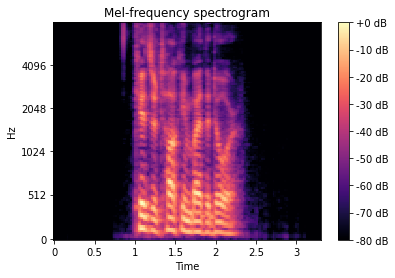

In [157]:
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

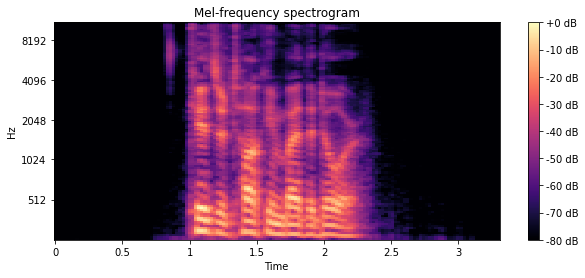

In [86]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load audio file
audio_data, sr = librosa.load(f)

# Compute mel spectrogram
n_fft = 2048
hop_length = 512
n_mels = 128
fmin = 20
fmax = sr // 2
S = librosa.feature.melspectrogram(y=audio_data, sr=sr, n_fft=n_fft,
                                    hop_length=hop_length, n_mels=n_mels,
                                    fmin=fmin, fmax=fmax)
S_dB = librosa.power_to_db(S, ref=np.max)

# Display mel spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr,
                         hop_length=hop_length, fmin=fmin, fmax=fmax)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.show()


In [90]:
S_dB[0]

array([-80.      , -80.      , -80.      , -80.      , -80.      ,
       -80.      , -80.      , -79.369774, -80.      , -80.      ,
       -80.      , -80.      , -80.      , -80.      , -80.      ,
       -80.      , -80.      , -80.      , -80.      , -80.      ,
       -80.      , -80.      , -80.      , -80.      , -80.      ,
       -80.      , -80.      , -80.      , -80.      , -80.      ,
       -80.      , -77.298096, -67.33882 , -64.64391 , -64.0981  ,
       -63.394157, -62.189438, -56.746323, -53.956673, -53.473274,
       -55.95214 , -52.256073, -52.02265 , -47.29535 , -45.413162,
       -49.505936, -50.33159 , -50.48236 , -46.62728 , -43.799538,
       -41.58745 , -43.004272, -47.728806, -45.395943, -46.720337,
       -46.920067, -41.260956, -38.806267, -41.968483, -50.155937,
       -48.44642 , -50.38253 , -50.521797, -50.11225 , -48.649734,
       -45.02864 , -46.70234 , -49.071396, -53.96251 , -60.60869 ,
       -52.947258, -48.846306, -49.92943 , -51.727295, -52.550